# Data augmentation
A common problem is the amount of data available to enter the models, for these to present the expected results it is necessary that the training occurs with a large amount of data (dataset), but in many cases there is no the data needed to perform these tasks.
This is where the **Data Augmentation** technique comes in, which, as it's name indicates, allows us to augment our dataset in two ways:




*   Introducing perturbations in the original data. For example: taking an original image centered, we replicate it off-center, inverting axes...
*   Using different distributions. Example: if we want to train a model to classify high resolution images, we add low resolution images, with noise...always maintaining the highest proportion of high resolution.



At first, neural networks are not intelligent. For example, a poorly trained neural network would think that these three tennis balls shown below are distinct and unique images.

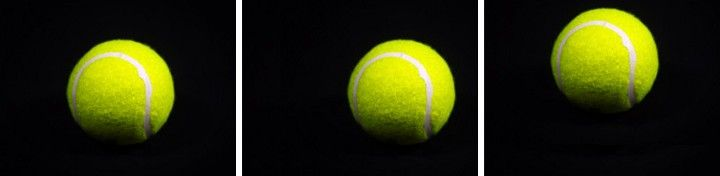



The same ball with some translations



So if we work with images, it is only necessary to make some small alterations to our dataset and we can achieve our goal.
There are many ways to augment data with images, such as:


1.   Turn (Flip)
2.   Rotation

1.   Scale
2.   Trim

1.   Translation
2.   Gaussian noise









The Keras library provides the ability to use data augmentation automatically when training a model.
This is accomplished by using the ImageDataGenerator class.
A variety of techniques are supported, as well as pixel scaling methods, such as:



*   The changes in the image (translations) through the arguments **width_shift_range** and **height_shift_range**.
*  Flip the image using the arguments **horizontal_flip** and **vertical_flip**.
*   Rotations of images through the  **rotation_range** argument.
*   Image brightness using the **brightness_range** argument.
* **shear_range**: Float. Shear Intensity (Shear angle in counter-clockwise direction in degrees)
*   Image zoom using the **zoom_range** argument.
* **rescale**: rescaling factor. Defaults to None. If None or 0, no rescaling is applied, otherwise we multiply the data by the value provided (after applying all other transformations).
* **preprocessing_function**: function that will be applied on each input. The function will run after the image is resized and augmented. The function should take one argument: one image (Numpy tensor with rank 3), and should output a Numpy tensor with the same shape.
* **data_format**: Image data format, either "channels_first" or "channels_last". "channels_last" mode means that the images should have shape (samples, height, width, channels), "channels_first" mode means that the images should have shape (samples, channels, height, width). It defaults to the image_data_format value found in your Keras config file at ~/ .keras/keras.json. If you never set it, then it will be "channels_last".
* **validation_split**: Float. Fraction of images reserved for validation (strictly between 0 and 1).
* **dtype**: Dtype to use for the generated arrays.


Let's independently look at examples of images after they have been magnified. It is common to use a variety of augmentation techniques at the same time during training.


Supported image formats: jpeg, png, bmp, gif. Animated gifs are truncated to the first frame.

Arguments

* **directory**: Directory where the data is located. If labels is "inferred", it should contain subdirectories, each containing images for a class. Otherwise, the directory structure is ignored.

* **labels**: Either "inferred" (labels are generated from the directory structure), or a list/tuple of integer labels of the same size as the number of image files found in the directory. Labels should be sorted according to the alphanumeric order of the image file paths (obtained via os.walk(directory) in Python).

* **label_mode**: - 'int': means that the labels are encoded as integers (e.g. for sparse_categorical_crossentropy loss). - 'categorical' means that the labels are encoded as a categorical vector (e.g. for categorical_crossentropy loss). - 'binary' means that the labels (there can be only 2) are encoded as float32 scalars with values 0 or 1 (e.g. for binary_crossentropy). - None (no labels).

* **class_names**: Only valid if "labels" is "inferred". This is the explict list of class names (must match names of subdirectories). Used to control the order of the classes (otherwise alphanumerical order is used).

* **color_mode**: One of "grayscale", "rgb", "rgba". Default: "rgb". Whether the images will be converted to have 1, 3, or 4 channels.

* **batch_size**: Size of the batches of data. Default: 32.

* **image_size**: Size to resize images to after they are read from disk. Defaults to (256, 256). Since the pipeline processes batches of images that must all have the same size, this must be provided.

* **shuffle**: Whether to shuffle the data. Default: True. If set to False, sorts the data in alphanumeric order.

* **seed**: Optional random seed for shuffling and transformations.
validation_split: Optional float between 0 and 1, fraction of data to reserve for validation.

* **subset**: One of "training" or "validation". Only used if validation_split is set.

* **interpolation**: String, the interpolation method used when resizing images. Defaults to bilinear. Supports bilinear, nearest, bicubic, area, lanczos3, lanczos5, gaussian, mitchellcubic.

* **follow_links**: Whether to visits subdirectories pointed to by symlinks. Defaults to False.

Takes the dataframe and the path to a directory + generates batches.

The generated batches contain augmented/normalized data.

* **dataframe**: Pandas dataframe containing the filepaths relative to directory (or absolute paths if directory is None) of the images in a string column. It should include other column/s depending on the class_mode: - if class_mode is "categorical" (default value) it must include the y_col column with the class/es of each image. Values in column can be string/ list/tuple if a single class or list/tuple if multiple classes. - if class_mode is "binary" or "sparse" it must include the given y_col column with class values as strings. - if class_mode is "raw" or "multi_output" it should contain the columns specified in y_col. - if class_mode is "input" or None no extra column is needed.

* **x_col**: string, column in dataframe that contains the filenames (or absolute paths if directory is None).
* **y_col**: string or list, column/s in dataframe that has the target data.
* **weight_col**: string, column in dataframe that contains the sample weights. Default: None.
* **target_size**: tuple of integers (height, width), default: (256, 256). The dimensions to which all images found will be resized.

* **save_to_dir**: None or str (default: None). This allows you to optionally specify a directory to which to save the augmented pictures being generated (useful for visualizing what you are doing).
* **save_prefix**: str. Prefix to use for filenames of saved pictures (only relevant if save_to_dir is set).
* **save_format**: one of "png", "jpeg" (only relevant if save_to_dir is set). Default: "png".

In [5]:
import matplotlib.pyplot as plt    #Library that allows graphing, very MATLAB style
import numpy as np                  #Library that allows working with arrangement  
from numpy import expand_dims       #Expand the array shape 
from keras.preprocessing.image import load_img    #From the Keras library for data augmentation, we load the image in the python image library (PIL) format
from keras.preprocessing.image import img_to_array #will take a picture (PIL) and convert it to a matrix. If part of a PNG image, the values within the image will be between 0 and 255.
from keras.preprocessing.image import ImageDataGenerator #class that takes original data, transforms it randomly and returns only the new transformed data
from PIL import Image #python image library
from urllib.request import urlopen #Lets you read an email address


First we upload an image from the internet


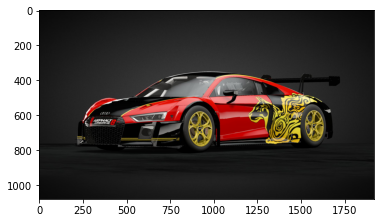

In [61]:
url = 'https://s3.amazonaws.com/gt7sp-prod/livery/85/21/10/7205852867180102185_23.jpg' 
filename = urlopen(url)
img = Image.open(filename)
plt.imshow(img)

Let's start with a makeover which means moving all the pixels in the image in one direction, such as horizontally or vertically, while keeping the same image dimensions.

The width_shift_range and height_shift_range arguments of the ImageDataGenerator constructor control the amount of horizontal and vertical scrolling respectively.


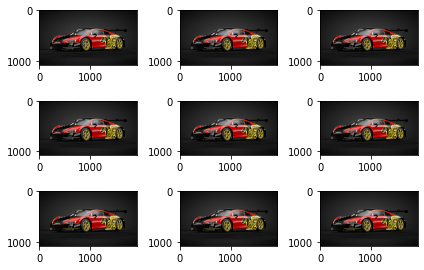

In [85]:
# We convert the image to an arrangement
data = img_to_array(img)
# we make an expansion to a sample 
samples = expand_dims(data, 0)
# We create the data augmenter using only makeover 
datagen = ImageDataGenerator(featurewise_center=False)
# we prepare the iterator
it = datagen.flow(samples, batch_size=1)
# we generate samples and display the results
for i in range(9):
	plt.subplot(330 + 1 + i)
	# batches of images are generated
	batch = it.next()
	image = batch[0].astype('uint8') #it is converted to a valid value to be able to display it as an image
	plt.imshow(image)
	plt.tight_layout()
plt.show()

An image flip means to reverse the rows or columns of pixels in the case of a vertical or horizontal flip, respectively.
The magnification is specified by a Boolean argument **horizontal_flip** or **vertical_flip** for the **ImageDataGenerator** class.

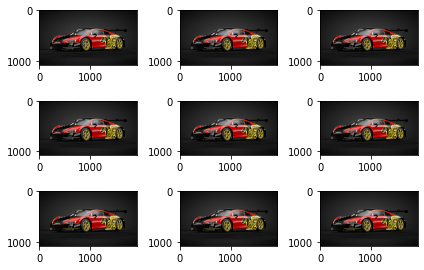

In [82]:
datagen = ImageDataGenerator(cval=100,
                             fill_mode = "nearest")
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
plt.show()

The amount of zoom is sampled uniformly at random from the zoom region for each dimension (width, height) separately.

Floating or [lower limit, upper limit]. Range for random zoom. If it is a float, [lower bound, upper bound] = [1-zoom_range, 1 + zoom_range]

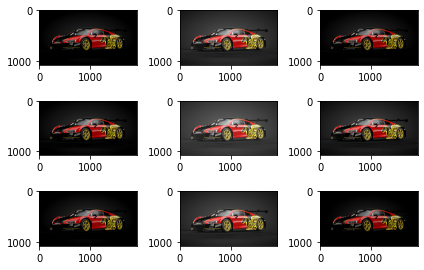

In [46]:
datagen = ImageDataGenerator(channel_shift_range=50)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
plt.show()

The image is randomly rotated clockwise a specified number of degrees from 0 to 360. It is likely to rotate pixels outside of the image frame, leaving areas of the frame with no pixel data, which need to be filled.

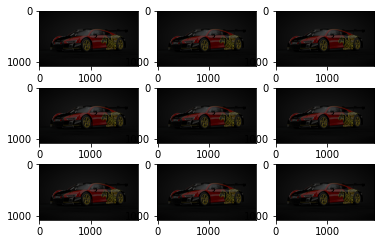

In [79]:
datagen = ImageDataGenerator(rescale=100/255)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

The combination of these techniques allows us to increase the amount of data in the dataset to be used, in many jobs a data augmentation is used to increase the amount of training images and improve the precision of the job.


              featurewise_center: Boolean, set the mean of each element to zero of all data.
              samplewise_center**: Boolean, set the mean of each sample to zero
              featurewise_std_normalization: Boolean, Divide the entries by the standard deviation (std.) Of the data set, based on characteristics.
              samplewise_std_normalization: Boolean, divide each data by its std.
              zca_epsilon: The default is 1e-6.
              zca_whitening: Boolean, indicates if ZCA bleaching is applied.      

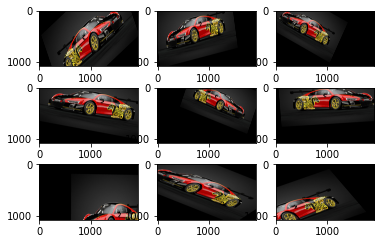

In [30]:
datagen = ImageDataGenerator(
            rotation_range               = 45,
            width_shift_range            = 0.4,   
            height_shift_range           = 0.4, 
            shear_range                  = 0.4,
            zoom_range                   = 0.4,
            horizontal_flip              = True,   
            fill_mode                = 'constant')  
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

Now we consider words, the necessary work is not so simple given the inherent complexity of the language (we cannot replace each word by its synonym and even if we do, we run the risk that the meaning of the sentence changes completely.
There are some libraries that can help us to carry out this task, we will start by analyzing the following:

1.   Text Attack
2.   Google Trans

# TextAttack
It is a Python framework for adversary attacks, adversary training, and data augmentation in NLP. We will focus only on data augmentation.

In [98]:
!pip install textattack

In [104]:
from textattack.augmentation import WordNetAugmenter, EmbeddingAugmenter, EasyDataAugmenter, CharSwapAugmenter

KeyboardInterrupt: ignored

In [101]:
text = "Will you look back on life and say, I wish I had, or I’m glad I did?"

TextAttack provides us with four methods for data augmentation.


## WordNetAugmenter
Augments the text by replacing it with synonyms from the WordNet thesaurus (thesaurus).

WordNet is a lexical database for English. Nouns, verbs, adjectives, and adverbs are grouped into sets of cognitive synonyms (synsets), each of which expresses a different concept.
WordNet superficially resembles a thesaurus in that it groups words based on their meaning.



In [ ]:
aug = WordNetAugmenter();
aug.augment(text)


## EmbeddingAugmenter
 Augment text by transforming words with their inlays, with a constraint to ensure that their cosine similarity is at least 0.8.


In [ ]:
aug = EmbeddingAugmenter();
aug.augment(text)

textattack: Downloading https://textattack.s3.amazonaws.com/word_embeddings/paragramcf.
100%|██████████| 481M/481M [00:13<00:00, 35.0MB/s]
textattack: Unzipping file /root/.cache/textattack/tmp5nhskcvl.zip to /root/.cache/textattack/word_embeddings/paragramcf.
textattack: Successfully saved word_embeddings/paragramcf to cache.


['Will you look back on life and say, I wish I had, or I’m delighted I did?']

## CharSwapAugmenter
Augment text by substituting, deleting, inserting, and swapping adjacent characters.

In [ ]:
aug = CharSwapAugmenter()
aug.augment(text)

['Will you jlook back on life and say, I wish I had, or I’m glad I did?']


## EasyDataAugmenter
This augments the text with a combination of Wordnet synonym replacement, word deletion, word order changes, and synonym insertions. All these 4 functionalities occur randomly. So we will get different results every time we run the code. This returns 4 augmented results, unlike the other methods.


In [ ]:
aug = EasyDataAugmenter()
aug.augment(text)

['Will you look back front on life and say, I wish I had, or I’m glad I did?',
 'Will you look gage on life and say, I wish I had, or I’m glad I did?',
 'wish you look back on life and say, I Will I had, or I’m glad I did?',
 'Will you look back life and say, I wish I had, or I’m glad I did?']

Googletrans uses the Google Translate Ajax API for language detection and translation.

The key parameters for the **translate ()** method are:



1.   **src**: Source language. this parameter is optional as **googletrans** will detect it.
2.   **dest**: target language. Mandatory parameter.

1.   **text**: the text to be translated from the source language to the target language. Mandatory parameter.





 



When using this method what happens is a retranslation, we go from the original language to a target language and then we return to the original, during this backtranslation, there is a slight change in the sentence between the original text and the backtranslated text, but the general meaning of the sentence is still preserved.

Supported languages can be found at https://cloud.google.com/translate/docs/languages?hl=es

To obtain the best results, it is recommended to do some tests with the languages, if the target language is very similar, the translation does not lose information, however there may be the problem that the translation is too literal, this becomes a bit of a problem. try and failure.


Some examples of languages:


*   Afrikáans	'af'

*   Chino (simplificado) 	'zh-CN o zh'

*   Esperanto	'eo'

*   Japonés	'ja'
*   Latín	'la'


*   Español	'es'


*   Turcomano	'tk'


*   Yiddish	'yi'

*   Zulú	'zu'



In [107]:
!pip install googletrans

     |████████████████████████████████| 61kB 4.0MB/s 
     |████████████████████████████████| 51kB 6.1MB/s 
     |████████████████████████████████| 972kB 7.8MB/s 
     |████████████████████████████████| 71kB 8.5MB/s 
     |████████████████████████████████| 61kB 8.9MB/s 
     |████████████████████████████████| 102kB 7.9MB/s 
  Created wheel for googletrans: filename=googletrans-3.0.0-cp36-none-any.whl size=15736 sha256=7ba6a981bb5e1b1e5cb2b5ad4c58db06a26241649b9333ae44888aaa41727d5a
  Stored in directory: /root/.cache/pip/wheels/28/1a/a7/eaf4d7a3417a0c65796c547cff4deb6d79c7d14c2abd29273e
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7666 sha256=94a9fa720093e1721e4f5b0549f2b66c415f2557b5252cc96b28b5efb9194759
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built googletrans contextvars


In [109]:
from googletrans import Translator
translator = Translator()

In [112]:
origin_text = "El éxito es caer siete veces y levantarte ocho."
text_trans = translator.translate(text=origin_text, dest='ja').text
final=translator.translate(text=text_trans, dest='af').text
print(origin_text)
print(text_trans)
print(final)

El éxito es caer siete veces y levantarte ocho.
成功は7回落ち、8回起きています。
Sukses het 7 keer geval en 8 keer gebeur.
